In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("takehome_user_engagement.csv")
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [9]:
df1=pd.read_csv("takehome_users.csv", encoding= 'ISO -8859-1')
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [10]:
df.shape

(207917, 3)

In [11]:
df1.shape

(12000, 10)

In [12]:
df1.rename(columns={'object_id':'user_id'},inplace=True)

In [13]:
data= pd.merge(df1,df,on='user_id',how='right')

In [61]:
data.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'time_stamp', 'visited', 'date', 'week', 'year', 'month'],
      dtype='object')

In [15]:
data['date'] = data['time_stamp'].astype('datetime64')
data['week'] = data['date'].dt.isocalendar().week
data['year'] = data['date'].dt.isocalendar().year
data['month'] =data['date'].dt.month

In [16]:
data.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited,date,week,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1,2014-04-22 03:53:30,17,2014,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1,2013-11-15 03:45:04,46,2013,11
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1,2013-11-29 03:45:04,48,2013,11
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,1,2013-12-09 03:45:04,50,2013,12
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,1,2013-12-25 03:45:04,52,2013,12


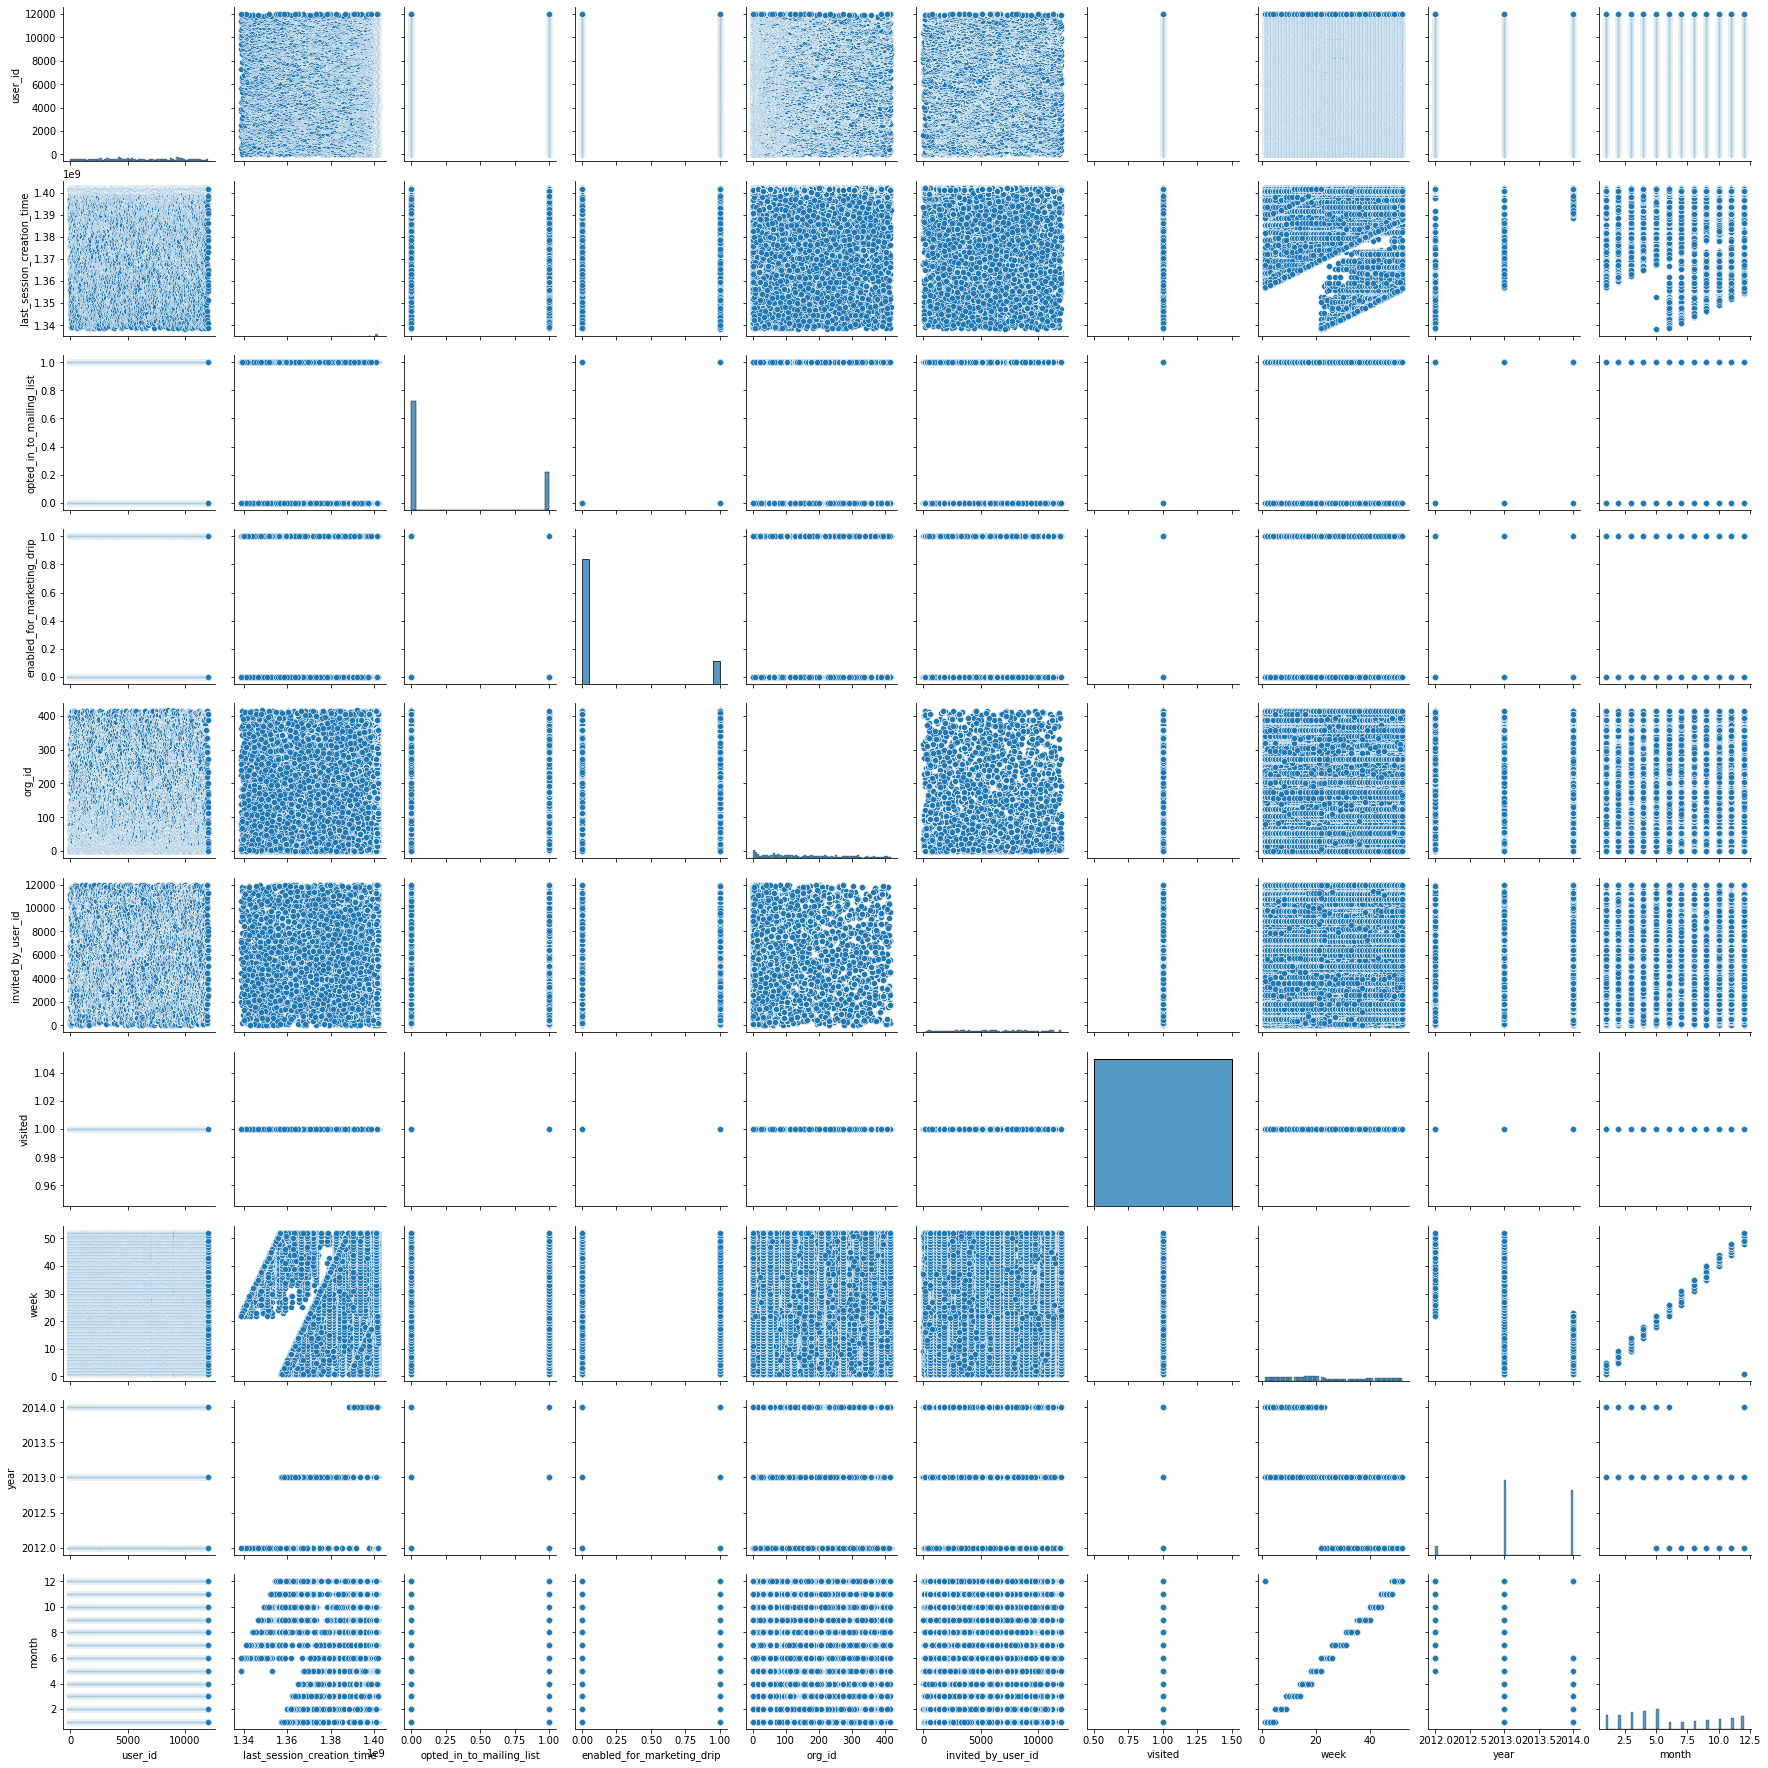

In [63]:
sns.pairplot(data)

In [17]:
groupby_week = data.groupby(['user_id','week','month','year'])['visited'].count().reset_index()
groupby_week.head()

,user_id,week,month,year,visited
0,1,17,4,2014,1
1,2,1,12,2014,1
2,2,2,1,2014,1
3,2,6,2,2014,3
4,2,7,2,2014,2


In [18]:
adopted_user = groupby_week.loc[groupby_week['visited'] >=3]
len(adopted_user)

32754

In [19]:
groupby_week['adopted_user'] = groupby_week['visited'].apply(lambda x: 1 if x >= 3 else 0)
groupby_week.head()

,user_id,week,month,year,visited,adopted_user
0,1,17,4,2014,1,0
1,2,1,12,2014,1,0
2,2,2,1,2014,1,0
3,2,6,2,2014,3,1
4,2,7,2,2014,2,0


In [58]:
groupby_week["adopted_user"]

0        0
1        0
2        0
3        1
4        0
        ..
75928    0
75929    0
75930    0
75931    0
75932    0
Name: adopted_user, Length: 75933, dtype: int64

In [20]:
df2 = groupby_week[(groupby_week['visited']>=3)].value_counts()
df2

user_id  week  month  year  visited  adopted_user
2        6     2      2014  3        1               1
7926     10    3      2014  7        1               1
         19    5      2014  4        1               1
                      2013  5        1               1
         18    5      2014  4        1               1
                                                    ..
4022     1     1      2013  6        1               1
4019     52    12     2013  7        1               1
                      2012  6        1               1
         51    12     2013  7        1               1
11988    21    5      2014  5        1               1
Length: 32754, dtype: int64

In [21]:
data.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'time_stamp', 'visited', 'date', 'week', 'year', 'month'],
      dtype='object')

In [22]:
data.dtypes

user_id                                int64
creation_time                         object
name                                  object
email                                 object
creation_source                       object
last_session_creation_time           float64
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
time_stamp                            object
visited                                int64
date                          datetime64[ns]
week                                  UInt32
year                                  UInt32
month                                  int64
dtype: object

In [26]:
data.dtypes.value_counts()

int64             6
object            5
float64           2
UInt32            2
datetime64[ns]    1
dtype: int64

In [28]:
data.select_dtypes(include=["object"]).columns

Index(['creation_time', 'name', 'email', 'creation_source', 'time_stamp'], dtype='object')

In [29]:
data.select_dtypes(include=["int"]).columns

Index(['user_id', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'org_id', 'visited', 'month'],
      dtype='object')

In [30]:
data.select_dtypes(include=["float"]).columns

Index(['last_session_creation_time', 'invited_by_user_id'], dtype='object')

In [23]:
data["opted_in_to_mailing_list"].value_counts()

0    154246
1     53671
Name: opted_in_to_mailing_list, dtype: int64

<AxesSubplot:ylabel='creation_source'>

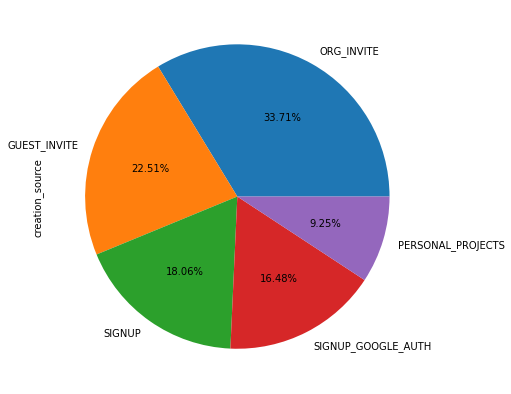

In [24]:
data["creation_source"].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,7))

<AxesSubplot:xlabel='creation_source', ylabel='count'>

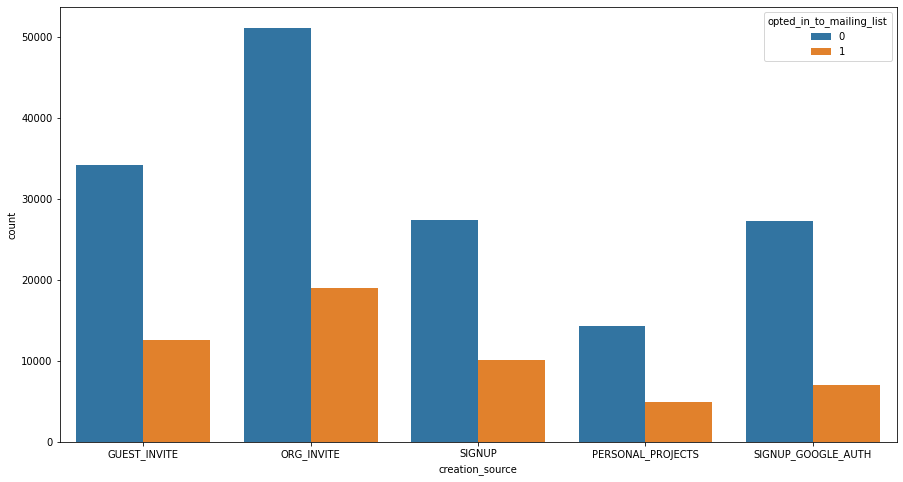

In [40]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=data,x='creation_source',hue="opted_in_to_mailing_list")

<AxesSubplot:xlabel='creation_source', ylabel='count'>

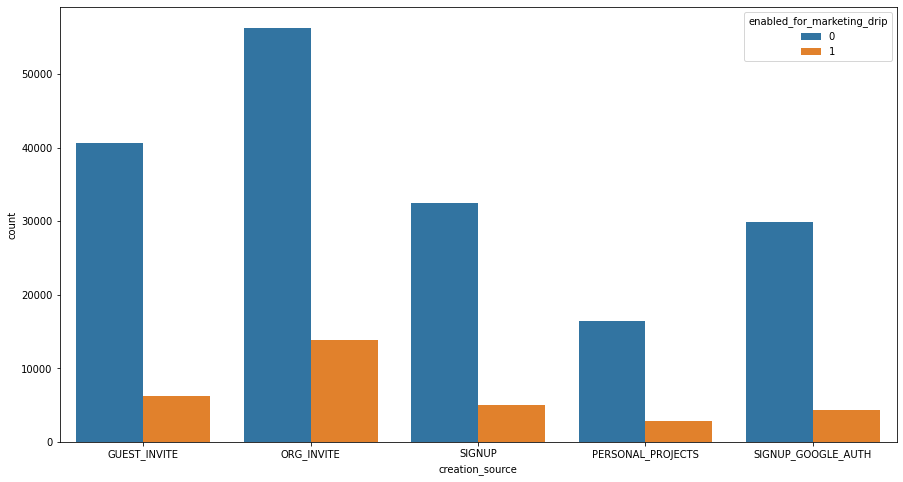

In [41]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=data,x='creation_source',hue= 'enabled_for_marketing_drip')

opted_in_to_mailing_list     0     1
creation_source                     
GUEST_INVITE              2742   875
ORG_INVITE                3226  1115
PERSONAL_PROJECTS          305    99
SIGNUP                    1701   582
SIGNUP_GOOGLE_AUTH        1032   323


Text(0, 0.5, 'opted_in_to_mailing_list')

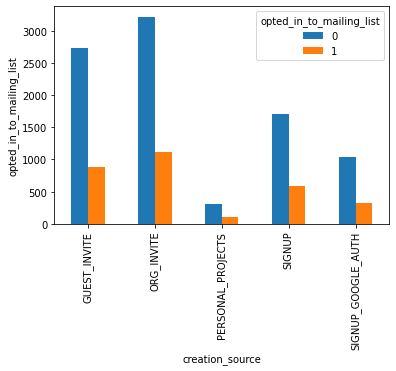

In [42]:
import scipy.stats as stats
c= pd.crosstab(data["creation_source"],df1["opted_in_to_mailing_list"])
print(c)
stats.chi2_contingency(c)
c.plot(kind="bar")
plt.ylabel("opted_in_to_mailing_list")

enabled_for_marketing_drip     0    1
creation_source                      
GUEST_INVITE                3079  538
ORG_INVITE                  3675  666
PERSONAL_PROJECTS            338   66
SIGNUP                      1948  335
SIGNUP_GOOGLE_AUTH          1168  187


Text(0, 0.5, 'enabled_for_marketing_drip')

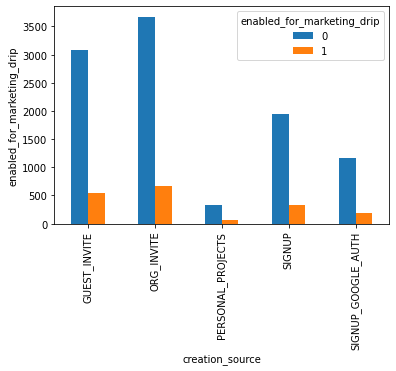

In [43]:
import scipy.stats as stats
c= pd.crosstab(data["creation_source"],df1['enabled_for_marketing_drip'])
print(c)
stats.chi2_contingency(c)
c.plot(kind="bar")
plt.ylabel('enabled_for_marketing_drip')

adopted_user            0      1
creation_source                 
GUEST_INVITE         9691   6797
ORG_INVITE          14607  11421
PERSONAL_PROJECTS    3679   2629
SIGNUP               9286   7099
SIGNUP_GOOGLE_AUTH   5916   4808


Text(0, 0.5, 'adopted_user')

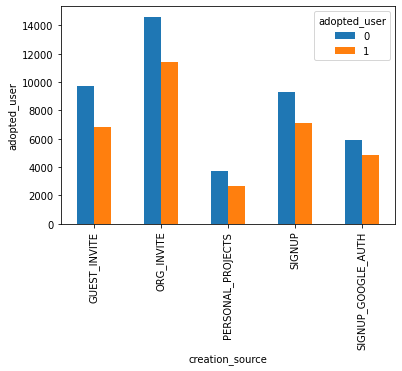

In [44]:
import scipy.stats as stats
c= pd.crosstab(data["creation_source"],groupby_week['adopted_user'])
print(c)
stats.chi2_contingency(c)
c.plot(kind="bar")
plt.ylabel("adopted_user")

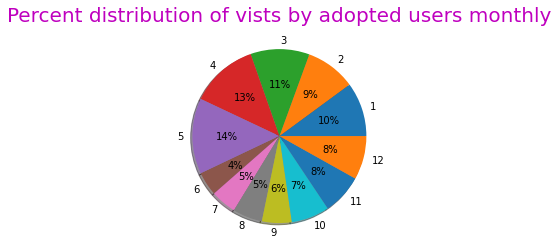

In [50]:
q = df2.groupby(['month']).size().values
p = df2.groupby(['month']).size().index
y = np.array(q)
x = np.array(p)
plt.pie(y, labels = x, autopct='%1.0f%%',shadow=True)
plt.title("Percent distribution of vists by adopted users monthly", color = 'm',fontsize=20)
plt.show()

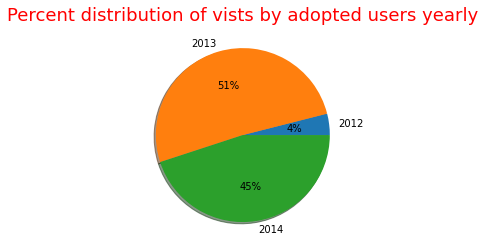

In [53]:
q = df2.groupby(['year']).size().values
p = df2.groupby(['year']).size().index
y = np.array(q)
x = np.array(p)
plt.pie(y, labels = x, autopct='%1.0f%%',shadow=True)
plt.title("Percent distribution of vists by adopted users yearly", color = 'r',fontsize=18)
plt.show()

In [64]:
data.corr()

,user_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,week,year,month
user_id,1.000000,-0.012878,-0.040880,-0.029354,-0.033602,0.127236,NaN,0.004055,-0.000955,0.002731
last_session_creation_time,-0.012878,1.000000,-0.004539,-0.008294,0.029462,0.005599,NaN,-0.058517,0.306269,-0.057818
opted_in_to_mailing_list,-0.040880,-0.004539,1.000000,0.472487,-0.042151,0.014271,NaN,-0.008013,0.010633,-0.007776
enabled_for_marketing_drip,-0.029354,-0.008294,0.472487,1.000000,-0.028640,0.023012,NaN,-0.003163,-0.005017,-0.003022
org_id,-0.033602,0.029462,-0.042151,-0.028640,1.000000,-0.106077,NaN,0.003537,-0.003282,0.003372
invited_by_user_id,0.127236,0.005599,0.014271,0.023012,-0.106077,1.000000,NaN,-0.009420,0.022291,-0.009597
visited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
week,0.004055,-0.058517,-0.008013,-0.003163,0.003537,-0.009420,NaN,1.000000,-0.685930,0.968852
year,-0.000955,0.306269,0.010633,-0.005017,-0.003282,0.022291,NaN,-0.685930,1.000000,-0.671674
month,0.002731,-0.057818,-0.007776,-0.003022,0.003372,-0.009597,NaN,0.968852,-0.671674,1.000000
